# $\color{#da291c} {\textbf{Santander Product Recommendation}}$

In [4]:
# IMPORT PACKAGES
import pandas as pd 
import numpy as np 

#  $\color{#3366cc} {\textbf{Read the Data}}$

In [5]:
#train_sample = pd.read_csv('santander_sample_submission.csv')
train = pd.read_csv('santander_train_ver2.csv')
test = pd.read_csv('santander_test_ver2.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
train.shape

(13647309, 48)

In [8]:
# Number of customers in the train and test dataset 

train_unique_customers = set(train.ncodpers.unique())
test_unique_customers = set(test.ncodpers.unique())
print("Number of customers in train : ", len(train_unique_customers))
print("Number of customers in test : ", len(test_unique_customers))
print("Number of common customers : ", len(train_unique_customers.intersection(test_unique_customers)))

Number of customers in train :  956645
Number of customers in test :  929615
Number of common customers :  929615


In [9]:
train['fecha_dato'].unique()

array(['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28',
       '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28',
       '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28',
       '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28',
       '2016-05-28'], dtype=object)

In [10]:
test['fecha_dato'].unique()

array(['2016-06-28'], dtype=object)

In [11]:
# Remove the duplicates from the train set if any
train.drop_duplicates()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [12]:
# Remove the duplicates from the test set if any
test.drop_duplicates()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,0,206,1,...,N,NaN,KAT,N,1,28.0,MADRID,1,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,26.0,"RIOJA, LA",0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,0,115,1,...,N,NaN,KBZ,N,1,33.0,ASTURIAS,1,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,33.0,ASTURIAS,0,147488.88,02 - PARTICULARES


In [13]:
# Types of data in the dataset 
train.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

# $\color{#3366cc} {\textbf{I. Handling the Missing Values}}$

In [14]:
missing_train = train.isna() # train.isnull() in pandas

In [15]:
missing_train.sum().sum()

31261901

In [16]:
missing_train.sum()
#test['age'].isna().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

## $\color{#3366cc} {\textbf{Explore the correlation among the features}}$

It is very likely that the missing values from some of the features 
is because of correlated features. The heatmeap that follows, illustrate 
the correlations that exist between all the features of the dataset.

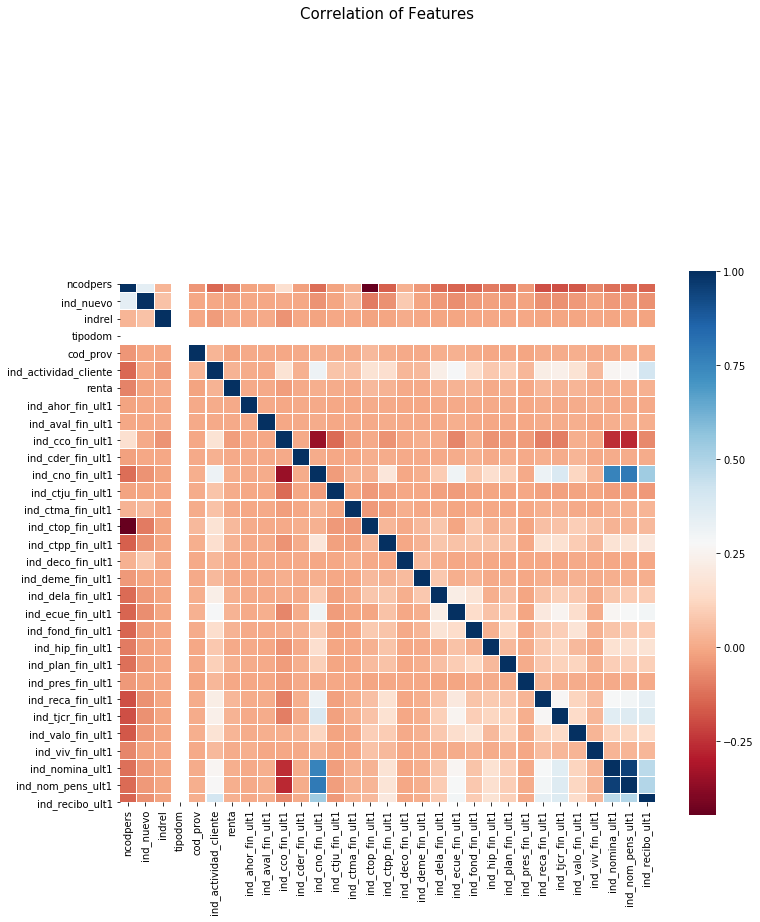

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt

colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))
plt.title('Correlation of Features', y=1.5, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

We observe that two features namely "ind_nonmina_ult1" and "ind_nomina_pens_ult1" 
and both have missing values. We will further investigate these two features 
in a section that follows. 

### We first try to delete the rows with missing values on the feature  "ind_empleado". It happens that these particular events experience the most missing values across all the features and thus it is beneficial to remove them. However, we still have a lot of missing values on our dataset that must be handled. 


In [19]:
train2 =  train.dropna(axis = 0, how='any', subset=['ind_empleado']) # 'ult_fec_cli_1t'

In [20]:
train2.shape

(13619575, 48)

In [22]:
train2.isna().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                    0
pais_residencia                 0
sexo                           70
age                             0
fecha_alta                      0
ind_nuevo                       0
antiguedad                      0
indrel                          0
ult_fec_cli_1t           13594782
indrel_1mes                122047
tiprel_1mes                122047
indresi                         0
indext                          0
conyuemp                 13617767
canal_entrada              158392
indfall                         0
tipodom                         1
cod_prov                    65857
nomprov                     65857
ind_actividad_cliente           0
renta                     2766641
segmento                   161634
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

## $\color{#3366cc} {\textbf{Missing Values from Column 'renta'}}$

Check the distribution of the data 'renta' 

 Command: If the histogram of the particular column's values doesn't have a normal distribution, we may conclude that the mean value may not be the best imputation strategy to fill in the missing values.

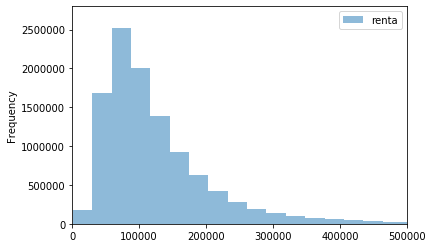

In [23]:
import matplotlib.pyplot as plt

train2.renta.plot.hist(bins=1000, alpha=0.5)
plt.axis([0, 500000, 0, 2800000]) 
plt.legend()
plt.show()
# It is close to a normal distribution, thus we can use the mean imputation.

###   We first try to impute the missing values using the mean and median of all the data from the column 

In [24]:
dfcopy1 = train2.copy()
dfcopy2 = train2.copy()

# Replace using mean 
mean = dfcopy1['renta'].mean()
dfcopy1['renta'].fillna(mean, inplace=True)
mean_renta = dfcopy1['renta'].values

# Replace using median 
median = dfcopy2['renta'].median()
dfcopy2['renta'].fillna(median, inplace=True)
median_renta = dfcopy2['renta'].values

In [25]:
from scipy import stats
stats.describe(mean_renta)

DescribeResult(nobs=13619575, minmax=(1202.73, 28894395.51), mean=134254.3182381295, variance=42381705885.653366, skewness=59.66044817068385, kurtosis=5770.0588916469715)

In [26]:
from scipy import stats
stats.describe(median_renta)

DescribeResult(nobs=13619575, minmax=(1202.73, 28894395.51), mean=127671.79892937475, variance=42551678388.17281, skewness=59.39831185674154, kurtosis=5731.605822855743)

In [27]:
# MICE imputation 
#pip install impyute  # import MICE
#from impyute.imputation.cs import mice

#X = train2[['renta']] #data.drop('Survived', axis=1)
#imputed = mice(X.values)
# run slowly
#len(mice_renta)

### Try to Impute with the Mean of each Providence.

In [26]:
dfcopy3 = train2.copy()

In [27]:
dfcopy3.nomprov.unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', 'ALMERIA',
       'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA', 'HUELVA',
       'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE', 'MELILLA',
       'TARRAGONA', 'ALAVA', nan, 'CEUTA'], dtype=object)

In [28]:
# We replace the nulls in the nomprov column with the word "UNKNOWN"
dfcopy3.loc[dfcopy3.nomprov.isnull(),"nomprov"] = "UNKNOWN"
#dfcopy3['nomprov'].isnull().any() check that are non null values in the column nomprov

Find the mean of each providence so we can see if there big differences between them. 

In [29]:
# Find the mean of each providence and 
def medianRentaProvAll(dfp):
    nameProv = dfp.nomprov.unique()[0]
    median = dfp.renta.median(skipna=True)
    print(nameProv, median)
    dfp.loc[dfp.renta.isnull(), 'renta'] = median
    return dfp
# Provide median by province
dfcopy3 = dfcopy3.groupby('nomprov').apply(medianRentaProvAll)  
# If any rows still null (i.e. a province has all null) then replace by overall median
dfcopy3.loc[dfcopy3.renta.isnull(), "renta"] = dfcopy3.renta.median

ALAVA 96967.65
ALBACETE 78657.29999999999
ALICANTE 67526.28
ALMERIA 73390.65
ASTURIAS 87199.38
AVILA 68561.28
BADAJOZ 62330.97
BALEARS, ILLES 123573.51
BARCELONA 131214.48
BIZKAIA 99978.78
BURGOS 89385.09
CACERES 67799.49
CADIZ 79016.37
CANTABRIA 95517.6
CASTELLON 66630.29999999999
CEUTA 128699.58
CIUDAD REAL 62193.45
CORDOBA 69106.89
CORUÑA, A 97689.3
CUENCA 67201.41
GIPUZKOA 80599.14
GIRONA 108963.21
GRANADA 82447.02
GUADALAJARA 92724.66
HUELVA 68994.29999999999
HUESCA 73467.81
JAEN 67886.4
LEON 80901.54000000001
LERIDA 64818.45
LUGO 64390.53
MADRID 139070.97
MALAGA 95102.61
MELILLA 117408.66
MURCIA 67813.86
NAVARRA 86649.27
OURENSE 79069.62
PALENCIA 86593.08
PALMAS, LAS 80948.61
PONTEVEDRA 97829.1
RIOJA, LA 89936.28
SALAMANCA 89831.25
SANTA CRUZ DE TENERIFE 82729.23
SEGOVIA 89311.56
SEVILLA 92710.35
SORIA 78810.9
TARRAGONA 88283.45999999998
TERUEL 76467.56999999999
TOLEDO 68867.76
UNKNOWN 137860.11000000002
VALENCIA 72988.98
VALLADOLID 92880.39
ZAMORA 74692.70999999999
ZARAGOZA 9995

In [30]:
grouped        = dfcopy3.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(dfcopy3,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
dfcopy3.sort_values("nomprov",inplace=True)
dfcopy3        = dfcopy3.reset_index()
new_incomes    = new_incomes.reset_index()

In [31]:
dfcopy3.loc[dfcopy3.renta.isnull(),"renta"] = new_incomes.loc[dfcopy3.renta.isnull(),"renta"].reset_index()
dfcopy3.loc[dfcopy3.renta.isnull(),"renta"] = dfcopy3.loc[dfcopy3.renta.notnull(),"renta"].median()
dfcopy3.sort_values(by="fecha_dato",inplace=True)

In [32]:
dfcopy3.nomprov.isnull().sum()

0

In [36]:
median_each_providence = dfcopy3['renta'].values

### Ilustrate the results and choose the best imputation method

In [21]:
# Original 'renta' data
orig_renta = train2['renta'].values

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Density')

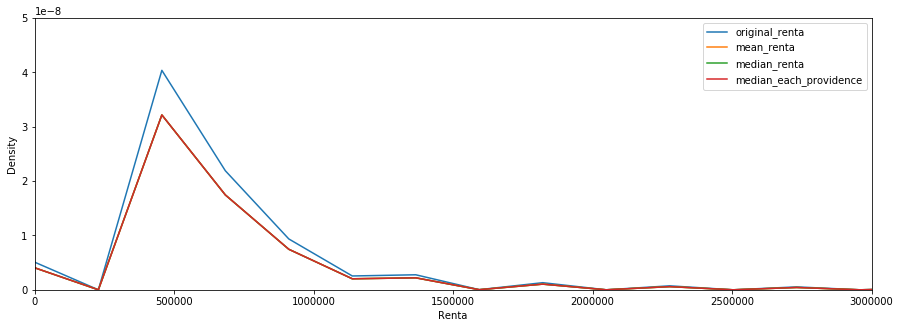

In [38]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.kdeplot(orig_renta, shade=False, bw=2, label="original_renta");
sns.kdeplot(mean_renta, shade=False, bw=2, label="mean_renta");
sns.kdeplot(median_renta, shade=False, bw=2, label="median_renta");
sns.kdeplot(median_each_providence, shade=False, bw=2, label="median_each_providence");
plt.axis([0, 3000000, 0, 0.00000005]) 
plt.legend();
plt.xlabel("Renta")
plt.ylabel("Density")

# We observe in the following density plot that the mean and median imputation do 
# not vary a lot, thus we can choose any of them, let's use the mean imputation method for the renta 

## Replace the missing values from the renta column using mean 

There is no difference between the methods, and thus we proceed by imputing the missing values using the mean. 

In [18]:
mean = train2['renta'].mean()
train2['renta'].fillna(mean, inplace=True)
train2['renta'].isnull().any()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


False

## $\color{#3366cc} {\textbf{Missing Values from Column 'nomprov'}}$

In [19]:
train2.loc[train2.nomprov.isnull(),"nomprov"] = "UNKNOWN"

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
#train2.isnull().sum() # any() if I want only True False 

## $\color{#3366cc} {\textbf{Missing values from columns ind_nomina_ult1 (Payroll) and ind_nom_pens_ult1 (pension)}}$

Both are boolean data (although normally boolean is true and false). 
From the heatmap we observe that these two features are highly corrrelated and we choose to 
delete one of them and impute the missing values of the other with the most frequent value. 

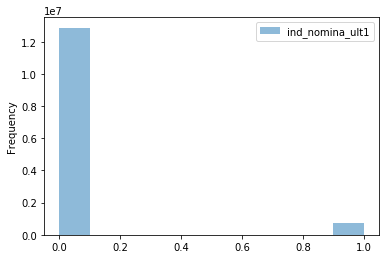

In [17]:
import matplotlib.pyplot as plt
# Payroll data 
train2.ind_nomina_ult1.plot.hist(bins=10, alpha=0.5)
plt.legend()

In [51]:
from scipy import stats
stats.describe(train2.ind_nomina_ult1)

DescribeResult(nobs=13619575, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

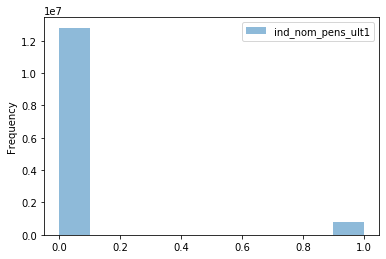

In [24]:
# Pension data 
train2.ind_nom_pens_ult1.plot.hist(bins=10, alpha=0.5)
plt.legend()

In [134]:
train.ind_nom_pens_ult1

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
13647304    0.0
13647305    0.0
13647306    0.0
13647307    0.0
13647308    0.0
Name: ind_nom_pens_ult1, Length: 13647309, dtype: float64

Drop the column 'ind_nom_pens_ult1' (pension data)

In [20]:
train2 =  train2.drop(['ind_nom_pens_ult1'], axis=1)

### we fill the missing values of the column with the payrolls with zero 

In [21]:
train2['ind_nomina_ult1'].fillna(0, inplace=True)
train2['ind_nomina_ult1'].isnull().any()

False

## $\color{#3366cc} {\textbf{Missing Values from Column 'sexo'}}$

We replace the nan with the word 'unknown'

In [22]:
train2['sexo'].isnull().any()

True

In [23]:
train2['sexo'].unique()

array(['H', 'V', nan], dtype=object)

In [24]:
train2.loc[train2.sexo.isnull(),"sexo"] = "UNKNOWN"

In [25]:
train2['sexo'].isnull().sum()

0

In [64]:
#train2.isnull().sum()

## $\color{#3366cc} {\textbf{Missing Values from Column 'ult_fec_cli_1t' = Last date as primary customer (if he isn't at the end of the month)}}$ 

In [26]:
train2['indrel'].unique()

array([ 1., 99.])

In [27]:
#column indrel indicates whether the customer was a primary at the start but not at the end of the month, 
#so lets check this value
train2[train2.ult_fec_cli_1t.isnull()]['indrel'].value_counts()

1.0    13594782
Name: indrel, dtype: int64

In [28]:
train2['ult_fec_cli_1t'].isnull().sum()

13594782

All the customers are still primary customers. We will update ult_fec_cli_1t with some future date

In [29]:
train2.loc[train2.ult_fec_cli_1t.isnull(), 'ult_fec_cli_1t'] = '2030-01-01'

## $\color{#3366cc} {\textbf{Missing Values from Column 'indrel_1mes' = Customer type 
at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)}}$

In [30]:
train2['indrel_1mes'].unique()

array([1.0, 3.0, 2.0, nan, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
       4.0, '2'], dtype=object)

Fill the nan with P: potential customer 

In [31]:
train2.indrel_1mes.fillna('P', inplace = True)

In [32]:
train2['indrel_1mes'].unique()

array([1.0, 3.0, 2.0, 'P', '1.0', '1', '3', '3.0', '2.0', '4.0', '4', 4.0,
       '2'], dtype=object)

In [33]:
indrel_status = {'1.0': 1, '2.0': 2, '1': 1, '2': 2, '3.0': 3, '3': 3, '4.0':4, '4':4, 'P':'P'}

In [34]:
train2['indrel_1mes'].replace(indrel_status, inplace=True)

In [35]:
train2['indrel_1mes'].unique()

array([1.0, 3.0, 2.0, 'P', 4], dtype=object)

In [36]:
#train2['indrel_1mes'] = train2['indrel_1mes'].astype(np.int64)
#train2.isnull().sum()

## $\color{#3366cc} {\textbf{Missing Values from Column 'segmento'--data from categorical to numerical}}$

In [37]:
train2.segmento.unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', '01 - TOP', nan],
      dtype=object)

In [38]:
# replace nan with zeros 
train2.segmento.fillna(0, inplace = True)

In [39]:
segmento_status = {'nan': 0, '01 - TOP': 1, '02 - PARTICULARES': 2, '03 - UNIVERSITARIO': 3}

In [40]:
train2['segmento'].replace(segmento_status, inplace=True)

In [41]:
train2['segmento'].unique()

array([2, 3, 1, 0])

In [42]:
train2['segmento'].isnull().sum()

0

In [43]:
#train2.isnull().sum()

## $\color{#3366cc} {\textbf{Missing Values from Column 'tiprel_1mes':Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)}}$

In [44]:
train2['tiprel_1mes'].unique()

array(['A', 'I', 'P', nan, 'R', 'N'], dtype=object)

In [45]:
# Fill the missing values with R: potential 
train2.tiprel_1mes.fillna('R', inplace = True)

In [46]:
train2['tiprel_1mes'].unique()

array(['A', 'I', 'P', 'R', 'N'], dtype=object)

## $\color{#3366cc} {\textbf{Missing Values from Column 'conyuemp':Spouse index. 1 if the customer is spouse of an employee}}$

In [47]:
train2['conyuemp'].unique()

array([nan, 'N', 'S'], dtype=object)

In [48]:
train2.loc[train2.conyuemp.isnull(),"conyuemp"] = "UNKNOWN"

In [49]:
train2['conyuemp'].isnull().any()

False

## $\color{#3366cc} {\textbf{Missing Values from Column 'canal_entrada':channel used by the customer to join}}$

In [50]:
train2['canal_entrada'].value_counts()#nunique()

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
        ...   
KDI         17
025         11
KDL         11
KHS          5
KHR          1
Name: canal_entrada, Length: 162, dtype: int64

In [51]:
train2['canal_entrada'].isnull().sum()

158392

In [52]:
train2.loc[train2.canal_entrada.isnull(),"canal_entrada"] = "UNKNOWN"

In [53]:
train2['canal_entrada'].isnull().any()

False

## $\color{#3366cc} {\textbf{Missing Values from Column 'cod_prov':Province code (customer's address)}}$

We have the name of the providence thus the providence code is not necessary and we prefer to drop it 

In [54]:
train2['cod_prov'].isnull().sum()

65857

In [55]:
train2.drop(["cod_prov"],axis=1,inplace=True)

In [56]:
train2.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  1
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
i

## $\color{#3366cc} {\textbf{Check the Column 'ult_fec_cli_1t':Last date as primary customer (if he isn't at the end of the month)}}$

In [57]:
train2['ult_fec_cli_1t'].unique()

array(['2030-01-01', '2015-07-02', '2015-07-23', '2015-07-06',
       '2015-07-30', '2015-07-20', '2015-07-08', '2015-07-22',
       '2015-07-17', '2015-07-09', '2015-07-03', '2015-07-29',
       '2015-07-13', '2015-07-21', '2015-07-27', '2015-07-14',
       '2015-07-01', '2015-07-24', '2015-07-15', '2015-07-16',
       '2015-07-28', '2015-07-07', '2015-07-10', '2015-08-21',
       '2015-08-19', '2015-08-25', '2015-08-14', '2015-08-24',
       '2015-08-17', '2015-08-18', '2015-08-10', '2015-08-13',
       '2015-08-27', '2015-08-03', '2015-08-06', '2015-08-20',
       '2015-08-26', '2015-08-28', '2015-08-05', '2015-08-11',
       '2015-08-07', '2015-08-04', '2015-08-12', '2015-09-17',
       '2015-09-01', '2015-09-18', '2015-09-03', '2015-09-02',
       '2015-09-14', '2015-09-16', '2015-09-29', '2015-09-28',
       '2015-09-09', '2015-09-22', '2015-09-08', '2015-09-11',
       '2015-09-21', '2015-09-04', '2015-09-25', '2015-09-07',
       '2015-09-10', '2015-09-23', '2015-09-24', '2015-

In [58]:
train2['ult_fec_cli_1t'].isnull().sum()

0

## $\color{#3366cc} {\textbf{Missing Values from Column 'tipodom':Addres type. 1, primary address}}$

In [59]:
train2.tipodom.isnull().sum()

1

We can drop the column tipodom, we already know the providence of each costumer. 

In [60]:
train2.drop(["tipodom"],axis=1,inplace=True)

In [61]:
train2.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
i

#  $\color{#3366cc} {\textbf{II. DATA EXPLORATION }}$

## $\color{#3366cc} {\textbf{Age distribution  }}$


In [62]:
train2['age'].unique()

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', ' 34', ' 48', ' 46', ' 54', ' 84', ' 15',
       ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52', ' 59',
       ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16', ' 11',
       ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96', ' 56',
       ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64', ' 20',
       ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75', '  4',
       ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91', ' 87',
       ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101', '106',
       '103', '  3', '  2', '102', '104', '111', '107', '109', '105',
       '112', '115', '110', '116', '108', '113', 37, 81, 43, 30, 45, 41,
       67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48, 60, 54,
       51, 3

In [67]:
train2['age'] = train2['age'].astype(np.int64)

In [69]:
#train2.dtypes

In [71]:
#train2.groupby('age').agg(np.size)
dfage =  train2['age']
dfage = dfage.astype(float)
dfage.value_counts(bins=11)
#df.groupby(['Name', 'Fruit'])['Number'].agg('sum')

(16.727, 31.455]                5296078
(31.455, 46.182]                3779430
(46.182, 60.909]                2701984
(60.909, 75.636]                1167148
(75.636, 90.364]                 471664
(1.8370000000000002, 16.727]     106843
(90.364, 105.091]                 93193
(105.091, 119.818]                 3213
(149.273, 164.0]                     11
(119.818, 134.545]                   11
(134.545, 149.273]                    0
Name: age, dtype: int64

In [81]:
tot_ages = train2['age'].value_counts()
len_unique = len(tot_ages)
print("Number of unique values in Customer Age : ",len_unique)
#np.maximum(dfage)
print("Most aged Customer is : ", np.max(train2['age'].values))
print("Junior most customer is : ", np.min(train2['age'].values))
print("Average age of customer is : ", np.mean(train2['age'].values))

Number of unique values in Customer Age :  120
Most aged Customer is :  164
Junior most customer is :  2
Average age of customer is :  40.18146491355274


In [84]:
train2['age'][train2['age'] > 120].count() 

22

In [85]:
train2['age'][train2['age']>120] = 100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


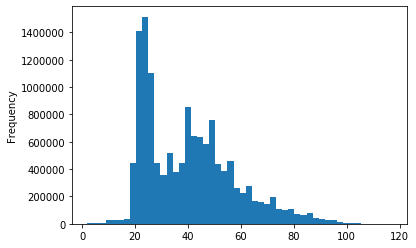

In [88]:
%matplotlib inline

dfage =  train2['age']
dfage = dfage.astype(float)
dfage.plot.hist(bins=50)

In [89]:
train2['age'].max()

117

In [92]:
# create group ages 
labels = ['0-18', '19-30', '31-60', '61-117']

train2['age_groups'] = pd
#train2['age'][train2['age']<=18] = 1
#train2['age'][19<=train2['age']<=30] = 2
#train2['age'][31<=train2['age']<=60] = 3
#train2['age'][61<=train2['age']<=117] = 4

In [ ]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
#lens[['age', 'age_group']].drop_duplicates()[:10]

## $\color{#3366cc} {\textbf{Categorical into numerical values }}$


In [174]:
train2.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                   int64
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_fin_ult1          int64
ind_ctop_fin_ult1          int64
ind_ctpp_f

In [175]:
train2['segmento'].head(-5)

0           2
1           3
2           3
3           3
4           3
           ..
13647299    3
13647300    3
13647301    3
13647302    3
13647303    3
Name: segmento, Length: 13619570, dtype: int64

### $\color{#3366cc} {\textbf{Convert float into integers: the payroll column & ind_actividad_cliente}}$


In [176]:
train2['ind_nomina_ult1'] = train2['ind_nomina_ult1'].astype(np.int64)

In [177]:
train2['ind_actividad_cliente'] = train2['ind_actividad_cliente'].astype(np.int64)

In [193]:
#data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

#gender_mapper = {'male': 0, 'female': 1}
#data['Sex'].replace(gender_mapper, inplace=True)

#data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
#data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']]
#data = data.rename(columns={'Title': 'Title_Unusual'})
#data.drop('Name', axis=1, inplace=True)

#data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']]
#data.drop('Cabin', axis=1, inplace=True)

#emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked')
#data = pd.concat([data, emb_dummies], axis=1)
#data.drop('Embarked', axis=1, inplace=True)

In [ ]:
#string_data = train2.select_dtypes(include=["object"])
#missing_columns = [col for col in string_data if string_data[col].isnull().any()]
#for col in missing_columns:
#    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
#del string_data

## $\color{#3366cc} {\textbf{III. DATA ILLUSTRATION  }}$


In [178]:
train2.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
nomprov                   object
ind_actividad_cliente      int64
renta                    float64
segmento                   int64
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_fin_ult1          int64
ind_ctop_fin_ult1          int64
ind_ctpp_f

In [179]:
# There are two types of data in the dataset: The customer related variables 
# and the Bank products. We name the Bank Products as our target values 

target_cols  = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
                  'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
                  'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
                  'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
                  'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
                  'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
                  'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
                  'ind_nomina_ult1','ind_recibo_ult1']
#target_cols = target_cols[2:]

## There exist two types of recommendation systems. The collaborative systems and the content-based systems. The latter is based on the description of the products that the system will recommend. In our dataset there is no information related to the bank products and thus a content-based recommendation system wouldn't be appropriate. The collaborative recommendation systems can be either user-based or item-based. We will use a user-based collaborative system called matrix factorization. 

## $\color{#3366cc} {\textbf{Model-based Collaborative System - Matrix Factorization}}$

Create a dataset that contains only the columns ncodpers and the target_cols

In [182]:
train2c = train2[['ncodpers', 'ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
                  'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
                  'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
                  'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
                  'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
                  'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
                  'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
                  'ind_nomina_ult1','ind_recibo_ult1']]

In [183]:
train2c.head()

,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_recibo_ult1
0,1375586,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1050611,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1050612,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1050613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1050614,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
train2c.shape

(13619575, 24)

## $\color{#3366cc} {\textbf{Build the utility matrix }}$


In [185]:
train2pivot = train2c.pivot_table(index="ncodpers",  
                                           values=target_cols, 
                                           aggfunc=np.sum, fill_value=0)

In [186]:
train2pivot.shape

(949614, 23)

In [187]:
train2pivot.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_nomina_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_recibo_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1
ncodpers,,,,,,,,,,,,,,,,,,,,,
15889,0,0,17,0,0,0,0,0,17,0,...,0,0,0,0,0,0,0,8,17,0
15890,0,0,0,0,17,0,0,0,17,0,...,0,0,17,17,0,0,17,17,0,0
15891,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15892,0,0,12,0,5,0,0,0,0,0,...,0,0,0,0,0,17,17,17,17,0
15893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0


In [188]:
# Number of customers in the train2 
#
train2_unique_customers = set(train2.ncodpers.unique())
print("Number of customers in train2 : ", len(train2_unique_customers))
print("Number of customers in train : ", len(train_unique_customers))

Number of customers in train2 :  949614
Number of customers in train :  956645


We have the sum of the each product that each customer bought the last 1.5 years as rating of each product

### Normalization of the data

In [195]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1),  copy=True)
train2pivot[target_cols] = min_max_scaler.fit_transform(train2pivot[target_cols])

In [196]:
train2pivot.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_nomina_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_recibo_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1
ncodpers,,,,,,,,,,,,,,,,,,,,,
15889,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.470588,1.0,0.0
15890,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,0.0,0.0
15891,0.0,0.0,0.058824,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
15892,0.0,0.0,0.705882,0.0,0.294118,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,0.0
15893,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0


In [202]:
# utility matrix = train2pivot
util_mat = train2pivot.copy()
util_mat.shape

(949614, 23)

### Transpose the utility matrix and then use SVD to decompose it down to synthetic representations of the customer reviews.

In [201]:
util_mat_T = util_mat.T
util_mat_T.shape

(23, 949614)

### Decompose the matrix

In [204]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=650)
result_matr = SVD.fit_transform(util_mat_T)
result_matr.shape

(23, 12)

### Generating a correlation matrix

In [205]:
corr_mat = np.corrcoef(result_matr)
corr_mat.shape

(23, 23)

### Check the correlation of a product and see its most similar products 

In [206]:
product_names = util_mat.columns

In [207]:
products_list = list(util_mat)

In [210]:
current_accounts = products_list.index('ind_cco_fin_ult1')
current_accounts

2

In [212]:
corr_account = corr_mat[2]
corr_account.shape

(23,)

This results to a single column vector. We use this to see what are the products that are 
highly correlated to the product current_accounts (= 'ind_cco_fin_ult1')


### $\color{#3366cc} {\textbf{Recommend a highly correlated product}}$


In [215]:
list(product_names[(corr_account<1.0) & (corr_account>0.5)])

['ind_ctma_fin_ult1', 'ind_deco_fin_ult1']

In [217]:
list(product_names[(corr_account<1.0) & (corr_account>0.6)])

['ind_ctma_fin_ult1']

### Find the products customers bought the last month (train dataset) and recommend them the most highly correlated product 

In [3]:
## Dataset show the results only for the month 2016-05-28

In [218]:
train_target = train2.loc[train2['fecha_dato'] == '2016-05-28']

In [220]:
train_target.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_recibo_ult1
12715856,2016-05-28,657640,N,ES,H,68,2006-11-17,0.0,114,1.0,...,0,0,0,0,0,0,0,0,0,0
12715857,2016-05-28,657788,N,ES,H,42,2006-11-18,0.0,114,1.0,...,0,0,0,0,0,0,0,0,0,0
12715858,2016-05-28,657795,N,ES,V,44,2006-11-18,0.0,114,1.0,...,0,0,0,0,0,0,0,0,0,0
12715859,2016-05-28,657790,N,ES,V,42,2006-11-18,0.0,114,1.0,...,0,0,0,0,0,1,0,0,1,1
12715860,2016-05-28,657794,N,ES,H,49,2006-11-18,0.0,114,1.0,...,0,0,0,0,0,0,0,0,0,0


#### Data from client 657790

In [222]:
# client 657790
train_target_cl = train_target.loc[train_target['ncodpers'] == 657790]
train_target_cl

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_recibo_ult1
12715859,2016-05-28,657790,N,ES,V,42,2006-11-18,0.0,114,1.0,...,0,0,0,0,0,1,0,0,1,1


### One of the products that the client bought is 'ind_tjcr_fin_ult1' = Credit card. Let's recommend to this client a product that is highly correlated with the credit card 

In [223]:
cred_card = products_list.index('ind_tjcr_fin_ult1')
cred_card

20

In [228]:
corr_creditcard = corr_mat[20]
corr_creditcard.shape

(23,)

In [229]:
list(product_names[(corr_creditcard<1.0) & (corr_creditcard>0.6)])

['ind_hip_fin_ult1']

### Based on the choice of the client to buy a credit card in May 2018 we could recommend him/her to buy Mortgage ('ind_hip_fin_ult1') next month